# **Лабораторная работа 3. Регрессионный анализ**

## Импорт библиотек

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()

Saving regression.xlsx to regression.xlsx


## **Часть 1:** Простая (парная) линейная регрессия

In [2]:
df = pd.read_excel('regression.xlsx', sheet_name='var10')

# Просмотр первых строк
print(df.head())

print(df.describe())

         x1        x2         y
0 -1.902743  1.174454 -3.563932
1 -1.815193  0.473463 -3.480813
2 -1.192628  0.665504 -1.392864
3 -1.467904  1.051478 -1.712252
4 -1.483684  1.014378 -2.725531
                x1           x2            y
count  1000.000000  1000.000000  1000.000000
mean      0.044651     0.559023    -0.631764
std       1.172901     0.693544     1.244411
min      -2.268936    -1.133808    -4.874503
25%      -1.227448    -0.126493    -1.521560
50%       0.232675     0.779679    -0.441559
75%       1.163499     1.088746     0.323018
max       2.070507     1.880813     2.940960


### 1.1 Модель для x1 и y

MSE: 0.877348039208179
MAE: 0.762478649122736
RMSE: 0.9366685855777267
R²: 0.36310392937741165
Коэффициенты: a = 0.7211206562308954, b = -0.6378018611986551
         True  Predicted
521 -0.156523  -0.781537
737 -1.803399   0.312475
740 -0.871581   0.265224
660  1.252465   0.221899
411  0.540211  -0.418798
..        ...        ...
408  0.598666  -0.426629
332 -1.993965  -1.446322
208 -2.032908  -1.347929
613 -0.020071  -0.770352
78  -0.845784  -1.341410

[200 rows x 2 columns]


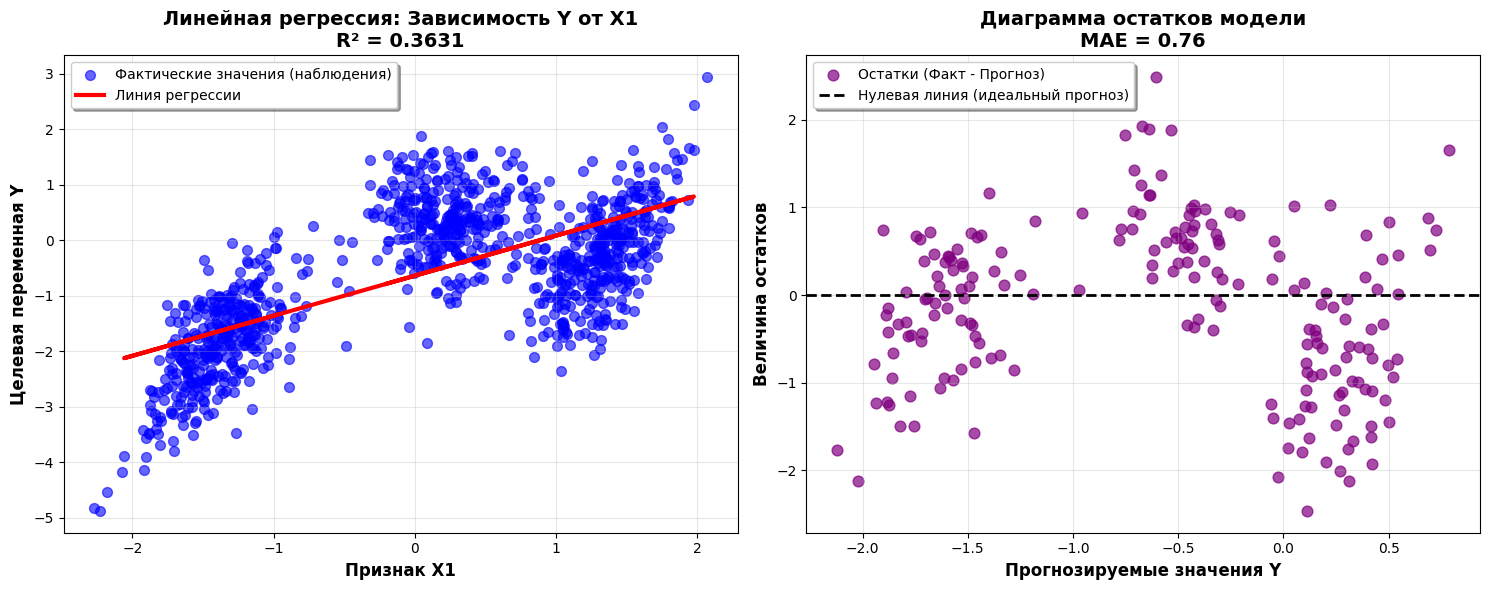

In [3]:
X1 = df[['x1']]
y = df['y']

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X1_train, y_train)

y_pred1 = model1.predict(X1_test)

# Метрики
mse1 = mean_squared_error(y_test, y_pred1)
mae1 = mean_absolute_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
r2_1 = r2_score(y_test, y_pred1)

print(f'MSE: {mse1}')
print(f'MAE: {mae1}')
print(f'RMSE: {rmse1}')
print(f'R²: {r2_1}')
print(f'Коэффициенты: a = {model1.coef_[0]}, b = {model1.intercept_}')

# Датафрейм true vs pred
comp_df1 = pd.DataFrame({'True': y_test, 'Predicted': y_pred1})
print(comp_df1)  # Вывод таблицы

# Создаем фигуру с двумя подграфиками
plt.figure(figsize=(15, 6))

# Первый график: регрессионная линия
plt.subplot(1, 2, 1)
plt.scatter(X1, y, color='blue', alpha=0.6, s=50, label='Фактические значения (наблюдения)')
plt.plot(X1_test, y_pred1, color='red', linewidth=3, label='Линия регрессии'.format(model1.coef_[0], model1.intercept_))
plt.xlabel('Признак X1', fontsize=12, fontweight='bold')
plt.ylabel('Целевая переменная Y', fontsize=12, fontweight='bold')
plt.title('Линейная регрессия: Зависимость Y от X1\nR² = {:.4f}'.format(r2_1), fontsize=14, fontweight='bold')
plt.legend(loc='best', frameon=True, shadow=True)
plt.grid(True, alpha=0.3)

# Второй график: остатки
plt.subplot(1, 2, 2)
residuals1 = y_test - y_pred1
plt.scatter(y_pred1, residuals1, color='purple', alpha=0.7, s=60, label='Остатки (Факт - Прогноз)')
plt.axhline(0, color='black', linestyle='--', linewidth=2, label='Нулевая линия (идеальный прогноз)')
plt.xlabel('Прогнозируемые значения Y', fontsize=12, fontweight='bold')
plt.ylabel('Величина остатков', fontsize=12, fontweight='bold')
plt.title('Диаграмма остатков модели\nMAE = {:.2f}'.format(mae1), fontsize=14, fontweight='bold')
plt.legend(loc='best', frameon=True, shadow=True)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Выводы по первой части. Модель x1, y

**Метрики:**
1.   **MSE (Mean Squared Error — среднеквадратичная ошибка)**

     MSE = 0.877348039208179

      MSE достаточно низкий, он меньше 1, значит модель точная

2.   **MAE (Mean Absolute Error — средняя абсолютная ошибка)**

      MAE =  0.762478649122736

      Модель ошибается в среднем на 0.7. Значение MAE меньше значения MSE, значит мало больших ошибок.

3.    **RMSE (Root Mean Squared Error — корень из MSE)**

      RMSE = 0.9366685855777267

      Метрика говорит о типичнй ошибке примерно равной 0.9. Значение у находится в диапазоне [-4.874503, 2.940960], значение RMSE нормальное для данного диапазона.

4.    **R² (коэффициент детерминации)**

      R² = 0.36310392937741165

      Значение метрики низкое, зависимость слабая, модель объясняет 36% изменений у, остальное - шум / другие факторы.

MSE: 1.0918406448346643
MAE: 0.787464499848318
RMSE: 1.0449117880637888
R²: 0.20739662555257943
Коэффициенты: a = -0.8621517723506906, b = -0.13037106827727168
         True  Predicted
521 -0.156523   0.165258
737 -1.803399  -1.243215
740 -0.871581  -1.217948
660  1.252465  -1.075416
411  0.540211  -0.025399
..        ...        ...
408  0.598666   0.219591
332 -1.993965  -0.833962
208 -2.032908  -1.190314
613 -0.020071   0.065275
78  -0.845784  -0.748636

[200 rows x 2 columns]


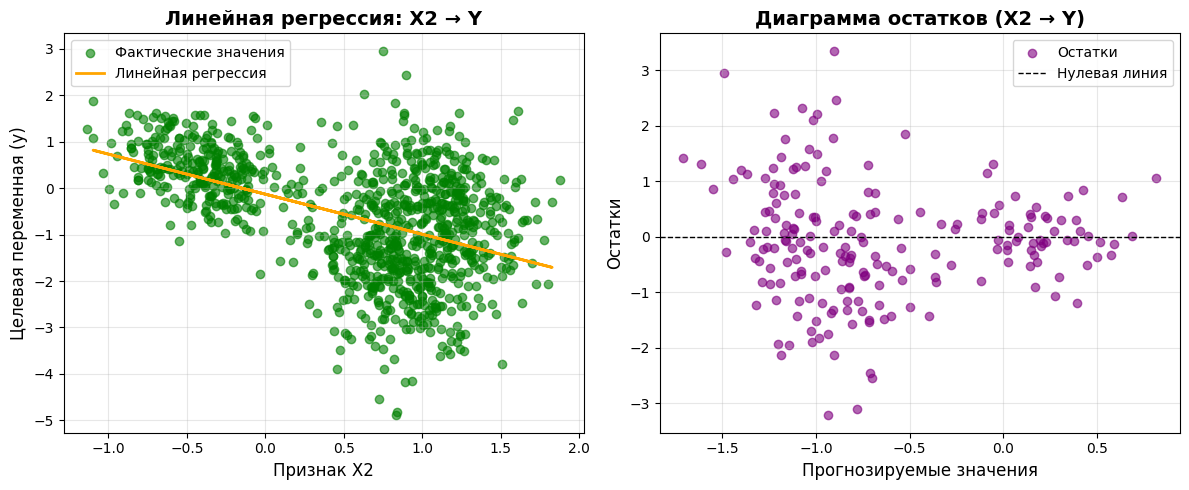

In [4]:
X2 = df[['x2']]

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y_train)

y_pred2 = model2.predict(X2_test)

mse2 = mean_squared_error(y_test, y_pred2)
mae2 = mean_absolute_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test, y_pred2)

print(f'MSE: {mse2}')
print(f'MAE: {mae2}')
print(f'RMSE: {rmse2}')
print(f'R²: {r2_2}')
print(f'Коэффициенты: a = {model2.coef_[0]}, b = {model2.intercept_}')

comp_df2 = pd.DataFrame({'True': y_test, 'Predicted': y_pred2})
print(comp_df2)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X2, y, color='green', alpha=0.6, label='Фактические значения')
plt.plot(X2_test, y_pred2, color='orange', linewidth=2, label='Линейная регрессия')
plt.xlabel('Признак X2', fontsize=12)
plt.ylabel('Целевая переменная (y)', fontsize=12)
plt.title('Линейная регрессия: X2 → Y', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals2 = y_test - y_pred2
plt.scatter(y_pred2, residuals2, color='purple', alpha=0.6, label='Остатки')
plt.axhline(0, color='black', linestyle='--', linewidth=1, label='Нулевая линия')
plt.xlabel('Прогнозируемые значения', fontsize=12)
plt.ylabel('Остатки', fontsize=12)
plt.title('Диаграмма остатков (X2 → Y)', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Выводы по первой части. Модель x2, y

**Метрики:**
1.   **MSE (Mean Squared Error — среднеквадратичная ошибка)**

      x1: MSE = 0.877348039208179

      x2: MSE = 1.0918406448346643


      MSE выше примерно на 0.1, теперь он чуть выше 1 и модель не такая точная

2.   **MAE (Mean Absolute Error — средняя абсолютная ошибка)**

      x1: MAE =  0.762478649122736

      x2: MAE =  0.787464499848318

      Модель стала больше ошибаться, ошибается на 0.79. Но больших ошибок мало, так как значение MAE меньше значения MSE.

3.    **RMSE (Root Mean Squared Error — корень из MSE)**

      x1: RMSE = 0.9366685855777267

      x2: RMSE = 1.0449117880637888

      Метрика говорит о типичнй ошибке примерно равной 1. Значение у находится в диапазоне [-4.874503, 2.940960], значение RMSE нормальное для данного диапазона, но типичная ошибка стала больше по значению

4.    **R² (коэффициент детерминации)**

      x1: R² = 0.36310392937741165

      x2: R² = 0.20739662555257943

      Значение метрики низкое, зависимость слабая, стала еще слабее, модель объясняет всего 20% изменений у, остальное - шум / другие факторы.

## **Часть 2:** Полиномиальная регрессия

Была выбрана пара x1 и y, так как график Residual Plot показал U-образное рассеяние. Это показывает не линейную зависимость данных и требует использование полинома.

Degree 2 MAE: 0.6438955995278005
Degree 2 R²: 0.47256715515001235


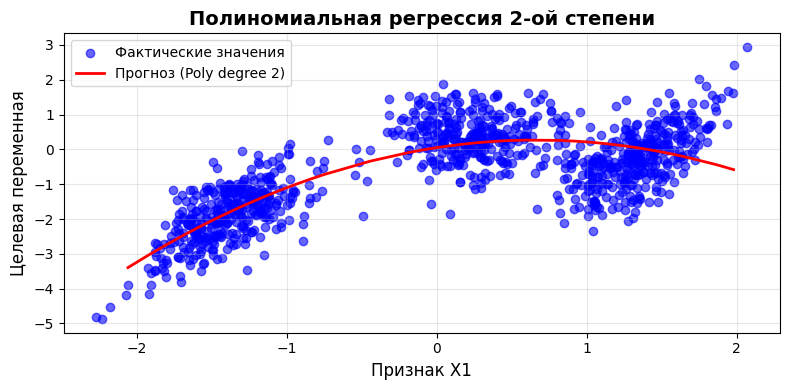

Degree 3 MAE: 0.612333283611405
Degree 3 R²: 0.5483693996654744


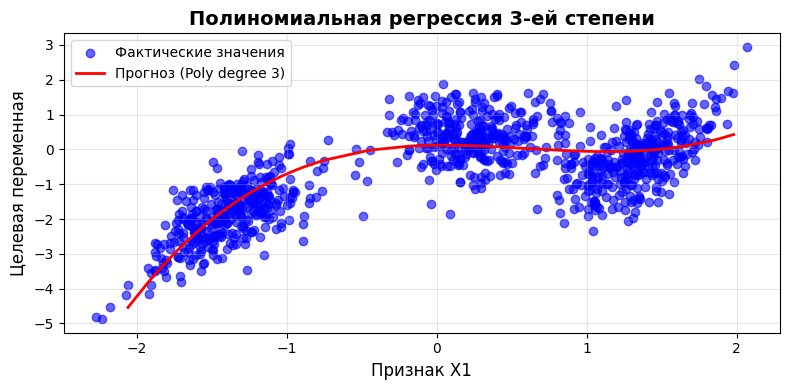

Degree 4 MAE: 0.5648445282397971
Degree 4 R²: 0.6345234929155816


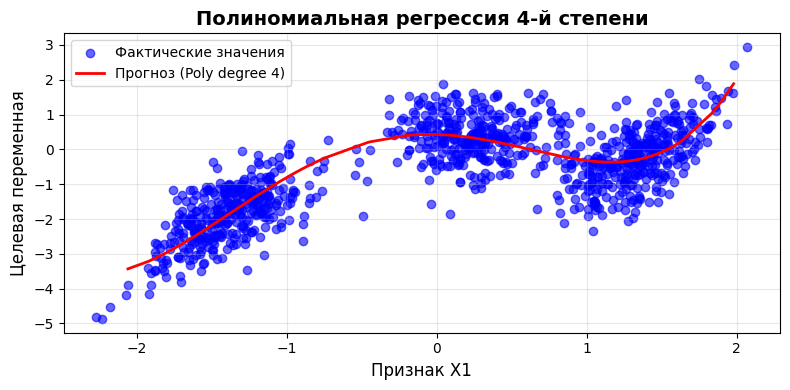

In [6]:
# Degree 2
poly2 = PolynomialFeatures(degree=2)
X1_poly2 = poly2.fit_transform(X1)

X1p2_train, X1p2_test, y_train, y_test = train_test_split(X1_poly2, y, test_size=0.2, random_state=42)

model_p2 = LinearRegression()
model_p2.fit(X1p2_train, y_train)

y_pred_p2 = model_p2.predict(X1p2_test)

mae_p2 = mean_absolute_error(y_test, y_pred_p2)
r2_p2 = r2_score(y_test, y_pred_p2)

print(f'Degree 2 MAE: {mae_p2}')
print(f'Degree 2 R²: {r2_p2}')

sort_idx_p2 = np.argsort(X1_test.values.flatten())

plt.figure(figsize=(8, 4))
plt.scatter(X1, y, color='blue', alpha=0.6, label='Фактические значения')
plt.plot(X1_test.values.flatten()[sort_idx_p2], y_pred_p2[sort_idx_p2], color='red', linewidth=2, label='Прогноз (Poly degree 2)')
plt.xlabel('Признак X1', fontsize=12)
plt.ylabel('Целевая переменная', fontsize=12)
plt.title('Полиномиальная регрессия 2-ой степени', fontsize=14, fontweight='bold')
plt.legend(loc='best', frameon=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
# Degree 3
poly3 = PolynomialFeatures(degree=3)
X1_poly3 = poly3.fit_transform(X1)

X1p3_train, X1p3_test, y_train, y_test = train_test_split(X1_poly3, y, test_size=0.2, random_state=42)

model_p3 = LinearRegression()
model_p3.fit(X1p3_train, y_train)

y_pred_p3 = model_p3.predict(X1p3_test)

mae_p3 = mean_absolute_error(y_test, y_pred_p3)
r2_p3 = r2_score(y_test, y_pred_p3)

print(f'Degree 3 MAE: {mae_p3}')
print(f'Degree 3 R²: {r2_p3}')

sort_idx_p3 = np.argsort(X1_test.values.flatten())

plt.figure(figsize=(8, 4))
plt.scatter(X1, y, color='blue', alpha=0.6, label='Фактические значения')
plt.plot(X1_test.values.flatten()[sort_idx_p3], y_pred_p3[sort_idx_p3], color='red', linewidth=2, label='Прогноз (Poly degree 3)')
plt.xlabel('Признак X1', fontsize=12)
plt.ylabel('Целевая переменная', fontsize=12)
plt.title('Полиномиальная регрессия 3-ей степени', fontsize=14, fontweight='bold')
plt.legend(loc='best', frameon=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Degree 4
poly4 = PolynomialFeatures(degree=4)
X1_poly4 = poly4.fit_transform(X1)

X1p4_train, X1p4_test, y_train, y_test = train_test_split(X1_poly4, y, test_size=0.2, random_state=42)

model_p4 = LinearRegression()
model_p4.fit(X1p4_train, y_train)

y_pred_p4 = model_p4.predict(X1p4_test)

mae_p4 = mean_absolute_error(y_test, y_pred_p4)
r2_p4 = r2_score(y_test, y_pred_p4)

print(f'Degree 4 MAE: {mae_p4}')
print(f'Degree 4 R²: {r2_p4}')

sort_idx_p4 = np.argsort(X1_test.values.flatten())

plt.figure(figsize=(8, 4))
plt.scatter(X1, y, color='blue', alpha=0.6, label='Фактические значения')
plt.plot(X1_test.values.flatten()[sort_idx_p4], y_pred_p4[sort_idx_p4], color='red', linewidth=2, label='Прогноз (Poly degree 4)')
plt.xlabel('Признак X1', fontsize=12)
plt.ylabel('Целевая переменная', fontsize=12)
plt.title('Полиномиальная регрессия 4-й степени', fontsize=14, fontweight='bold')
plt.legend(loc='best', frameon=True)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Выводы

**Метрики**:

Первоначальные: MSE = 0.87, R² = 0.36


1.   degree 2: MSE = 0.64, degree 3: MSE = 0.47, degree 4: MSE = 0.56
2.   degree 2: R² = 0.47, degree 3: R² = 0.54, degree 4: R² = 0.63

MSE самый лучший у degree 3, так как самый низкий показатель. В сравнении с линейной регрессией уменьшился в 2 раза, модель стала намного точнее.

R² лучший у degree 4, так как объясняет 63% данных, что почти в два раза больше, чем у линейной регрессии.

Оптимальная степень полинома degree = 3, так как MSE показывает хороший результат, R² тоже хороший, отличает от R² при degree = 4 всего на 0.9 единиц, что незначительно.

При низкой степени есть риск недообучения, при высокой степени есть риск переобучения, поэтому степень 3 оптимальна и показывает хорошие результаты.

## Часть 3: Множественная регрессия на salary.csv

In [8]:
uploaded = files.upload()

Saving salary.csv to salary.csv


Целевая: salary — предсказываемая, остальные — признаки.


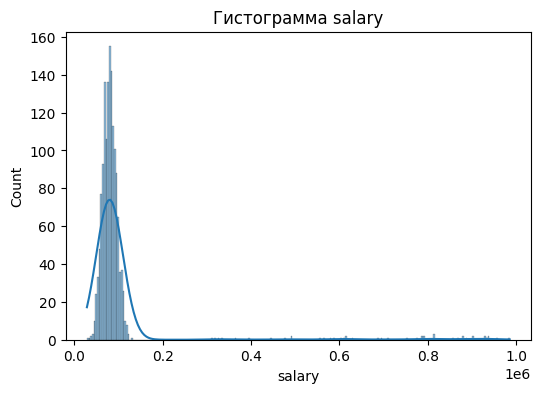

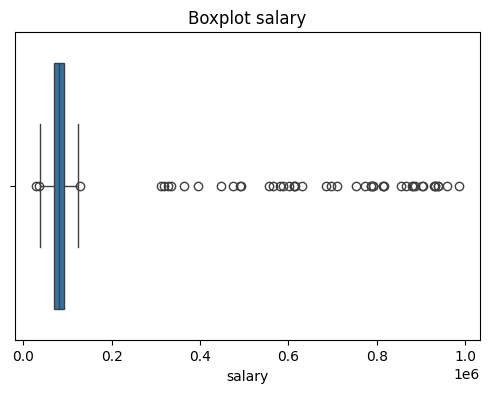

Выбросы обработаны: clipped к 1.5 IQR, чтобы модель не искажалась extremes.


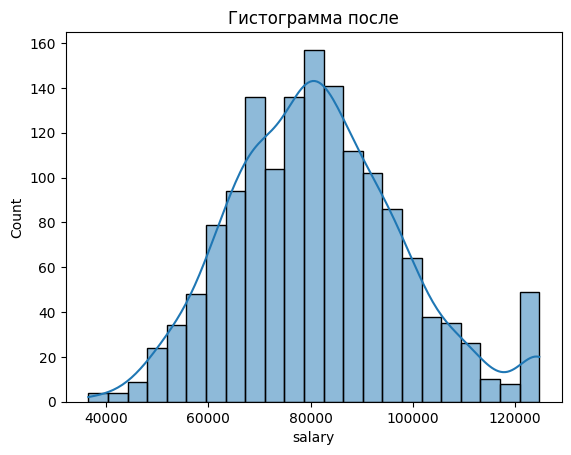

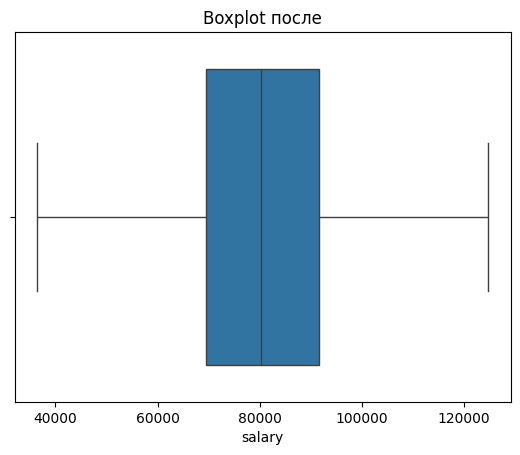

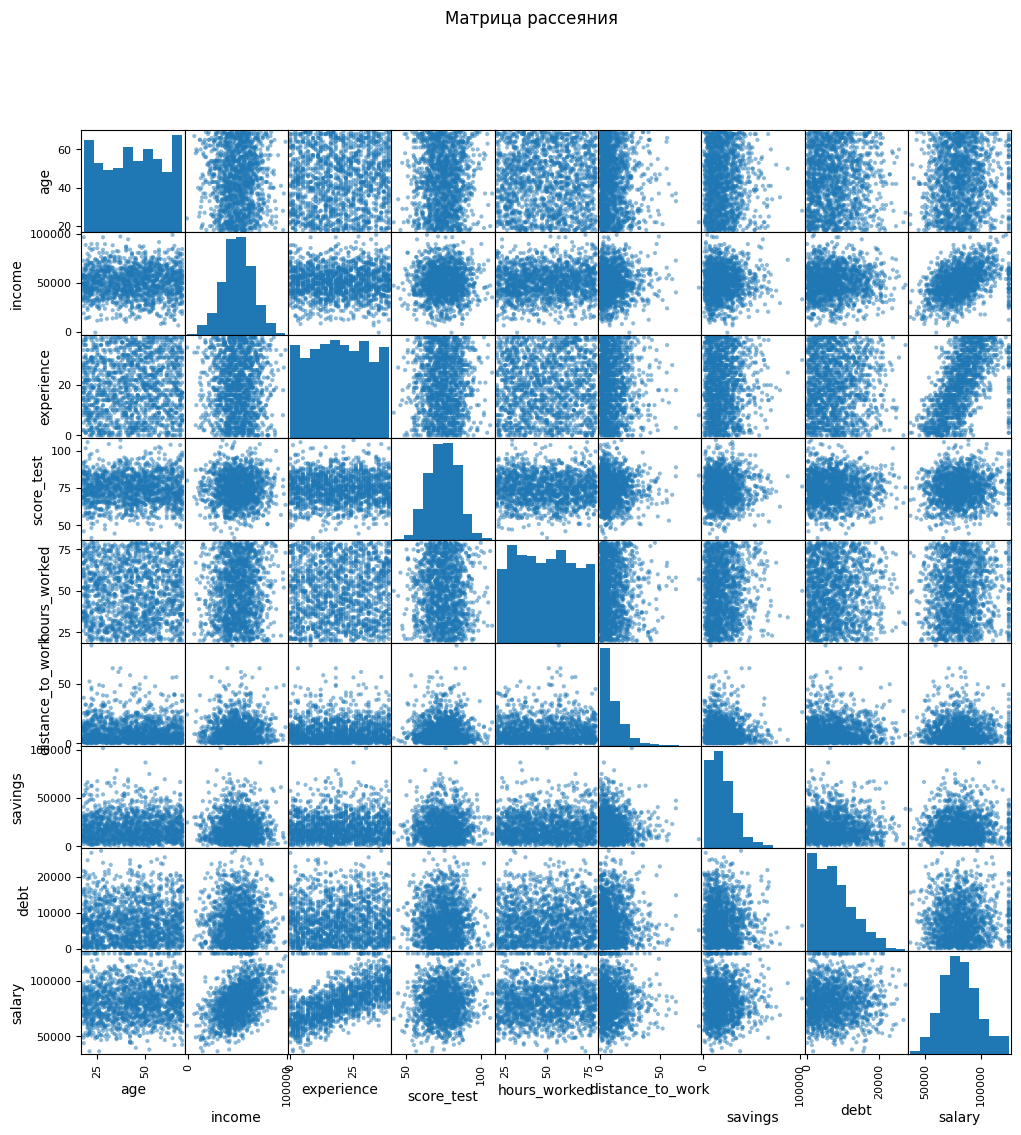

MSE: 114339173.78839365
MAE: 6543.98914205634
RMSE: 10692.94972345768
R²: 0.6205248892794295
               True      Predicted
1116   51903.858260   58704.637256
1368   95326.909439   94088.059577
422    90717.615265   86539.936932
413    84107.847083   83117.495988
451    62854.220757   68559.963759
...             ...            ...
983   108393.433043   97880.090768
799    68559.692777   71319.645225
1265   97698.158387   90072.116051
1150   81595.796248   72286.875081
824    96001.631026  102415.319538

[300 rows x 2 columns]
               True      Predicted
1116   51903.858260   58704.637256
1368   95326.909439   94088.059577
422    90717.615265   86539.936932
413    84107.847083   83117.495988
451    62854.220757   68559.963759
...             ...            ...
983   108393.433043   97880.090768
799    68559.692777   71319.645225
1265   97698.158387   90072.116051
1150   81595.796248   72286.875081
824    96001.631026  102415.319538

[300 rows x 2 columns]


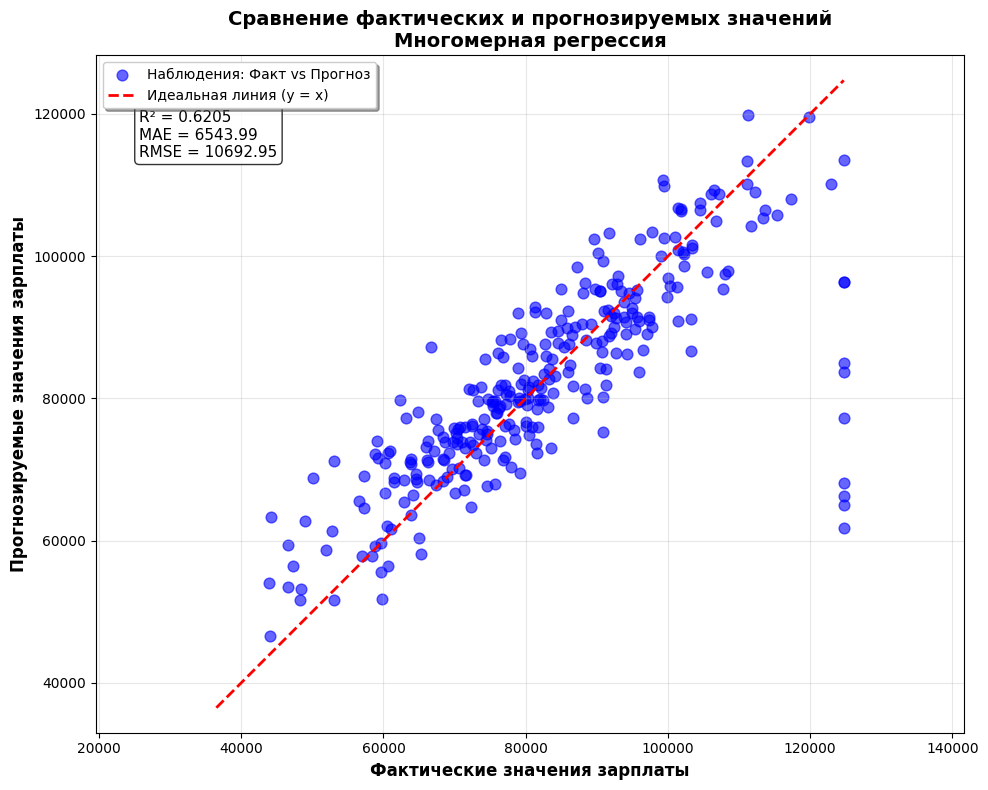

In [9]:
df_salary = pd.read_csv('salary.csv')

# Целевая: salary
print('Целевая: salary — предсказываемая, остальные — признаки.')

# Виз target
plt.figure(figsize=(6,4))
sns.histplot(df_salary['salary'], kde=True)
plt.title('Гистограмма salary')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df_salary['salary'])
plt.title('Boxplot salary')
plt.show()

# Обработка выбросов (clip по IQR)
Q1 = df_salary['salary'].quantile(0.25)
Q3 = df_salary['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_salary['salary'] = df_salary['salary'].clip(lower_bound, upper_bound)
print('Выбросы обработаны: clipped к 1.5 IQR, чтобы модель не искажалась extremes.')

# Виз после
sns.histplot(df_salary['salary'], kde=True)
plt.title('Гистограмма после')
plt.show()

sns.boxplot(x=df_salary['salary'])
plt.title('Boxplot после')
plt.show()

# Scatter matrix (numeric only)
numeric_cols = df_salary.select_dtypes(include=np.number).columns
pd.plotting.scatter_matrix(df_salary[numeric_cols], figsize=(12,12))
plt.suptitle('Матрица рассеяния')
plt.show()

# One-hot categorical
df_salary = pd.get_dummies(df_salary, columns=['education', 'city', 'job_type', 'marital_status', 'car', 'remote_work'], drop_first=True)


num_cols = ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt']
scaler = StandardScaler()
df_salary[num_cols] = scaler.fit_transform(df_salary[num_cols])

X = df_salary.drop('salary', axis=1)
y = df_salary['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

y_pred_multi = model_multi.predict(X_test)

# Метрики
mse_multi = mean_squared_error(y_test, y_pred_multi)
mae_multi = mean_absolute_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f'MSE: {mse_multi}')
print(f'MAE: {mae_multi}')
print(f'RMSE: {rmse_multi}')
print(f'R²: {r2_multi}')

# DF true vs pred
comp_df_multi = pd.DataFrame({'True': y_test, 'Predicted': y_pred_multi})
print(comp_df_multi)

# DF true vs pred
comp_df_multi = pd.DataFrame({'True': y_test, 'Predicted': y_pred_multi})
print(comp_df_multi)

# График true vs pred
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_multi, color='blue', alpha=0.6, s=60, label='Наблюдения: Факт vs Прогноз')

# Идеальная линия прогноза
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Идеальная линия (y = x)')

plt.xlabel('Фактические значения зарплаты', fontsize=12, fontweight='bold')
plt.ylabel('Прогнозируемые значения зарплаты', fontsize=12, fontweight='bold')
plt.title('Сравнение фактических и прогнозируемых значений\nМногомерная регрессия', fontsize=14, fontweight='bold')

# Добавляем метрики в аннотацию
metrics_text = f'R² = {r2_multi:.4f}\nMAE = {mae_multi:.2f}\nRMSE = {rmse_multi:.2f}'
plt.annotate(metrics_text, xy=(0.05, 0.85), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
             fontsize=11)

plt.legend(loc='upper left', frameon=True, shadow=True)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.tight_layout()
plt.show()

1. В качестве целевой переменной была выбрана Salary, так как цель предсказать доход по факторам.

2. Гистограмма и boxplot показывают, что есть выбросы в датасете. После удаления выбросов на гистограмме и boxplot видно ровные графики. Уделение выбросов необходимо, так как из-за них будет искажена метрика MSE.


3. Диаграмма рассеяния показывает линейную зависимость таких признаков, как опыт и зарплата.

4. **MSE: 114339173.** Большое число из-за квадрата и масштаба salary (зарплаты в тысячах долларов, квадраты — миллионы). Высокое MSE указывает на наличие значительных отклонений в предсказаниях, особенно если есть большие ошибки.

5. **MAE = 6543.99.** Это средняя абсолютная разница между true и predicted. Значение говорит о том, что в среднем модель ошибается на 6544 доллара при предсказании зарплаты. Ошибка приемлемая для зарплат в диапазоне 50-100 тыс., но значительная для низкооплачиваемых. Модель даёт "примерный" прогноз, но не точный.

6. **RMSE = 10692.95.** RMSE выше MAE, что указывает на наличие некоторых крупных ошибок. Масштаб 10 тыс. значит, что предсказания в среднем отклоняются на 10-20% от реальности. Это подтверждает среднее качество: для бизнеса (HR) — нормально для ориентира, но для контрактов — нет (слишком грубо).

7. **R² = 0.6205.** Значение 0.62 означает, что модель захватывает около 62% вариации зарплат, а оставшиеся 38% — это необъяснённый шум, влияние неучтённых факторов (например, рынок труда, инфляция) или случайные ошибки. Модель средняя по качеству — лучше, чем случайные догадки (R² > 0), но не отличная (идеально — ближе к 0.8-0.9). В предметной области это значит, что признаки (опыт, образование, город) полезны, но не всесторонне объясняют salary. На практике: модель подойдёт для грубой оценки (например, в HR для ориентира), но не для точных расчётов (риск недооценки/переоценки на 38%).

8. Модель часто завышает/занижает на 5-10 тысяч (согласовано с MAE = 6.5 тысяч). Близкие значения (как 95.326 и 94.088) — модель хорошо работает на "средних" данных. Большие расхождения (как 108.393 и 97.880) — возможно,  слабые признаки (например, для высоких зарплат модель недооценивает из-за редкости). Паттерны: Завышение для низких salary (51.903 получается 58.704), занижение для высоких (108.393 получается 97.880) — смещение к среднему. Это типично для линейной регрессии на скошенных данных. Таблица подтверждает метрики — ошибки не случайны полностью, модель "усредняет".

9. Анализ коэффициентов показал, что наибольшую прибавку к зарпалте (в размере 11.676 рублей) дает образование со степенью доктора наук.

    Далее идут такие факторы, как опыт образование со степенью магистра и годовой доход до текущей работы. Небольшую прибавку к зарплате до 200 рублей дают такие факторы, как возраст, общий объём текущих долгов, город проживания Хьюстон и расстояние от дома до места работы.

    Уменьшают размер зарплаты такие факторы, как наличие только школьного образования (уменьшение в размере 5.403 рублей), наличие автомобиля.

## Общий вывод по работе

В ходе выполнения лабораторной работы №3 по регрессионному анализу были изучены и применены на практике основные методы и алгоритмы регрессии, а также проведена оценка их эффективности с использованием различных метрик качества. Работа состояла из нескольких этапов, каждый из которых позволил глубже понять особенности построения регрессионных моделей и их интерпретации.

На первом этапе была построена линейная регрессионная модель на основе признака x1 и целевой переменной y. В результате обучения модели были получены метрики качества: MSE = 0,877, MAE = 0,762, RMSE = 0,937 и R² = 0,363. Анализ этих показателей показал, что модель обладает умеренной точностью, однако коэффициент детерминации R² указывает на слабую объяснительную способность модели, лишь 36,3% изменений переменной y могут быть объяснены признаком x1. Это свидетельствует о наличии неучтённых факторов или шума в данных. Для сравнения была также построена модель на основе признака x2, которая показала ещё более низкие результаты: R² = 0,207, что подтвердило недостаточную информативность этого признака для прогнозирования y.

На втором этапе работы была исследована возможность улучшения качества прогноза за счёт использования полиномиальной регрессии. Были построены модели с различными степенями полинома: 2, 3 и 4. Наилучшие результаты показала модель с degree = 3, у которой MSE составил 0,47, а R² = 0,54. Это свидетельствует о значительном улучшении по сравнению с линейной моделью. При degree = 4 значение R² достигло 0,63, однако риск переобучения и незначительное улучшение метрики MSE позволили сделать вывод о том, что степень 3 является оптимальной. Данный этап наглядно продемонстрировал важность выбора адекватной сложности модели для достижения баланса между точностью и обобщающей способностью.

Третий этап работы был посвящён анализу реальных данных из файла salary.csv. После предварительной обработки данных, включая удаление выбросов и стандартизацию признаков, была построена линейная регрессионная модель для прогнозирования заработной платы. Полученные метрики: MSE = 114 339 173, MAE = 6543,99, RMSE = 10 692,95 и R² = 0,6205 — указывают на среднее качество модели. Модель объясняет около 62% вариаций зарплаты, что является приемлемым результатом для грубой оценки, но недостаточным для точных прогнозов. Анализ коэффициентов модели показал, что наибольшее положительное влияние на зарплату оказывают уровень образования (докторская степень), опыт работы и предыдущий доход. Напротив, такие факторы, как наличие только школьного образования или автомобиля, снижают прогнозируемый уровень дохода.

В заключение можно сказать, что лабораторная работа позволила приобрести практические навыки построения и оценки регрессионных моделей, а также анализа их метрик. Было показано, что выбор признаков, учёт нелинейных зависимостей и предобработка данных играют ключевую роль в повышении качества моделей. Полученные результаты могут быть использованы для решения прикладных задач прогнозирования в условиях реальных данных.


### Дополнительное задание №12

Импортируем необходимые библиотеки

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns

Будем продолжать работать с переменной **df_salary**, так как в ней хранится прочитанный файл с датасетом.



Сравнение моделей:


,Model,MSE,MAE,RMSE,R²
0,Linear Regression,1.143392e+08,6543.99,10692.95,0.6205
1,Ridge Regression,1.144045e+08,6547.78,10696.01,0.6203
2,Random Forest,1.224457e+08,7141.72,11065.52,0.5936
3,Polynomial (deg=3),1.473264e+08,8010.06,12137.81,0.5110


/tmp/ipython-input-1943169974.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='R²', palette='viridis')


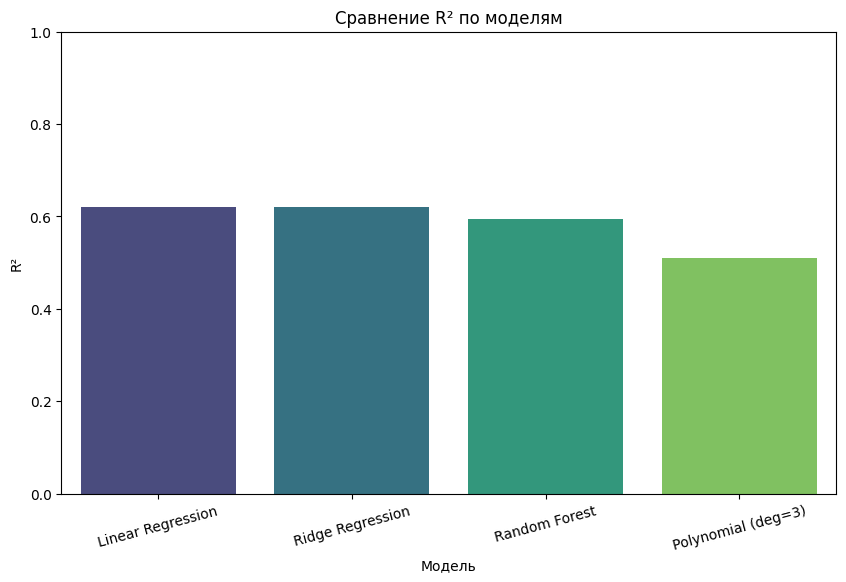

In [11]:
# Список моделей для обучения
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial (deg=3)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}

# Обучение и сбор метрик
results = []

for name, model in models.items():
    # Обучение
    model.fit(X_train, y_train)
    # Предсказание
    y_pred = model.predict(X_test)

    # Метрики
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MSE': round(mse, 2),
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R²': round(r2, 4)
    })

# Создание таблицы
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R²', ascending=False).reset_index(drop=True)
print("\nСравнение моделей:")
display(results_df)

# Визуализация (опционально)
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='R²', palette='viridis')
plt.title('Сравнение R² по моделям')
plt.ylabel('R²')
plt.xlabel('Модель')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.show()

### Выводы по дополнительному заданию

Линейные модели демонстрируют превосходство: как простая линейная регрессия, так и ее регуляризованная версия показали наилучшие результаты, что свидетельствует о преимущественно линейной зависимости в данных.

Random Forest уступает линейным методам, что может указывать на избыточную сложность модели для данной задачи, необходимость тонкой настройки гиперпараметров, преимущество линейных зависимостей в данных.

Полиномиальная модель показала наихудший результат, вероятно из-за переобучения или недостаточной обоснованности квадратичных зависимостей.

Объясняющая способность моделей - значение R² ≈ 0,62 у лучших моделей указывает на удовлетворительное, но не исчерпывающее объяснение дисперсии целевой переменной.

Рекомендация для дальнейшего использования: рекомендуется линейная регрессия как наиболее сбалансированная и интерпретируемая модель с наилучшими метриками качества.